# Datasets

> 🤗 Datasets is a library for easily accessing and sharing datasets for Audio,
>  Computer Vision, and Natural Language Processing (NLP) tasks.

https://huggingface.co/datasets

In [1]:
%pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [58]:
from datasets import load_dataset_builder

rt_builder = load_dataset_builder("rotten_tomatoes")

from pprint import pprint
pprint(rt_builder.info.homepage)

'http://www.cs.cornell.edu/people/pabo/movie-review-data/'


In [59]:
from datasets import load_dataset

rt_dataset = load_dataset("rotten_tomatoes")

rt_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
})

In [60]:
rt_dataset["train"][3]


{'text': 'if you sometimes like to go to the movies to have fun , wasabi is a good place to start .',
 'label': 1}

## Datasets of Different Types

### Image Dataset

In [44]:
from datasets import load_dataset

pk_dataset = load_dataset("keremberke/pokemon-classification", "mini")

pk_dataset

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 70
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 70
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 70
    })
})

In [45]:
pk_dataset["train"][0]

{'image_file_path': '/Users/davidhuvr/.cache/huggingface/datasets/downloads/extracted/b12ba78ee48e679c384aedeb0b1b3c46d6974968dabf5aa92c3d59f62de9ae53/Alakazam/image.jpg0.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 'labels': 127}

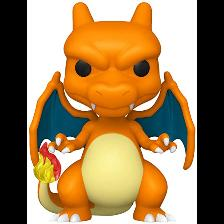

In [46]:
pk_dataset["train"][3]["image"]


---

### Audio Datasets



In [54]:
%pip install soundfile
%pip install librosa

Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for librosa from https://files.pythonhosted.org/packages/e2/a2/4f639c1168d7aada749a896afb4892a831e2041bebdcf636aebfe9e86556/librosa-0.10.1-py3-none-any.whl.metadata
  Obtaining dependency information for audioread>=2.1.9 from https://files.pythonhosted.org/packages/57/8d/30aa32745af16af0a9a650115fbe81bde7c610ed5c21b381fca0196f3a7f/audioread-3.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for scipy>=1.2.0 from https://files.pythonhosted.org/packages/50/8b/2057417a07a6fee8ed8be40e37bac4a502cae4cf44468a02962bbe81b8af/scipy-1.11.3-cp311-cp311-macosx_12_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.4/165.4 kB 3.4 MB/s eta 0:00:003.2 MB/s eta 0:00:01
  Obtaining dependency information for scikit-learn>=0.20.0 from https://files.pythonhosted.org/packages/db/0d/1f6d2cd52c886707b00ddb7ed2504cbf10903a60a7bebcd71f0f77d53505/scikit_learn-1.3.1-cp311-cp311-

In [56]:
from datasets import load_dataset

d_dataset = load_dataset("437aewuh/dog-dataset")

d_dataset

Resolving data files: 100%|██████████| 300/300 [00:00<00:00, 632.65it/s]


DatasetDict({
    train: Dataset({
        features: ['audio', 'label'],
        num_rows: 300
    })
})

In [57]:
d_dataset["train"][0]

ImportError: Numba needs NumPy 1.25 or less

In [64]:
import torch
from datasets import load_dataset
embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")

speaker_embeddings = embeddings_dataset[7306]["xvector"]
speaker_embeddings = torch.tensor(speaker_embeddings).unsqueeze(0)
speaker_embeddings

tensor([[-7.5731e-02, -2.7370e-02,  1.4933e-02,  4.5861e-02,  8.3840e-03,
         -2.7535e-02, -5.1030e-02, -6.1435e-02,  1.4576e-02,  1.9632e-02,
         -7.7323e-02, -7.8355e-02,  5.8233e-02,  3.7577e-02,  1.4377e-02,
          1.7147e-02, -1.3966e-02,  1.3549e-03,  9.4501e-03,  9.6230e-03,
          3.8752e-02,  2.5284e-03, -1.5207e-02, -4.5730e-02, -7.0040e-02,
         -8.4035e-03, -5.4758e-02,  4.7528e-03,  5.4306e-02,  1.8867e-02,
         -2.7039e-03,  2.1273e-02,  3.8547e-02, -4.7406e-02,  1.2328e-02,
         -6.9829e-02,  2.7079e-02,  5.5035e-02, -6.0107e-02, -6.4483e-02,
          6.6905e-03, -5.0482e-02,  4.0781e-02,  3.7543e-03,  3.2528e-02,
         -1.2350e-01, -1.8370e-02,  1.1340e-02, -5.8363e-02,  4.8635e-02,
          1.9366e-02,  3.4130e-02,  2.4126e-02,  1.6346e-02, -8.6061e-02,
          2.4379e-03,  1.1567e-02,  3.0723e-02,  3.2634e-02,  1.7792e-02,
          3.7105e-02, -1.0155e-02, -1.4131e-02,  4.0054e-02,  2.5886e-03,
          2.7985e-02,  1.8849e-02, -3.

In [66]:
from IPython.display import Audio

Audio(speaker_embeddings, rate=16000)